# k-Means Clustering Algorithm of Water Melon Data Set
## Data set taken from Machine Learning by Zhi-Hua Zhou.

# Initialisations

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [48]:
file_name = "melon.csv"
df = pd.read_csv(file_name)
df = df.to_numpy()

# Data Visualisation

In [49]:
x = df[:,0]
x

array([0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666,
       0.243, 0.245, 0.343, 0.639, 0.657, 0.36 , 0.593, 0.719, 0.359,
       0.339, 0.282, 0.748, 0.714, 0.483, 0.478, 0.525, 0.751, 0.532,
       0.473, 0.725, 0.446])

In [50]:
y = df[:,1]
y

array([0.46 , 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091,
       0.267, 0.057, 0.099, 0.161, 0.198, 0.37 , 0.042, 0.103, 0.188,
       0.241, 0.257, 0.232, 0.346, 0.312, 0.437, 0.369, 0.489, 0.472,
       0.376, 0.445, 0.459])

Text(0.5, 1.0, 'Water Melon Data Set 4.0')

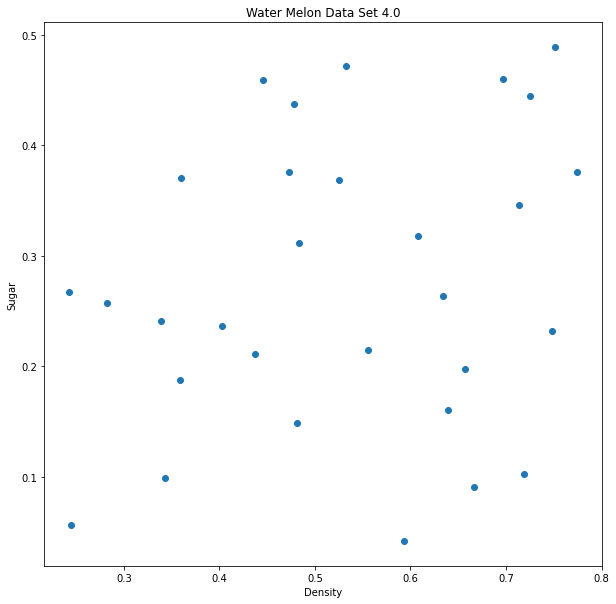

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel('Density')
plt.ylabel('Sugar')
plt.title('Water Melon Data Set 4.0')

# K-Means Algorithm

In [59]:
df.shape

(30, 2)

In [54]:
def select_k_random_samples(k: int, df):
    a = [x for x in range(df.shape[0])]
    mu = []
    for i in range(k):
        mu_i = np.random.choice(a)
        mu.append(df[mu_i])
        a.remove(mu_i)
    return np.array(mu)

def mean_squared_error(x_1, x_2, n):
    # n dimensional vectors x_1 and x_2
    s = 0
    for i in range(n):
        s += ((x_1[i] - x_2[i]) ** 2)
    return np.sqrt(s)

In [55]:
def k_means_clustering(k: int, df):
    m = df.shape[0]
    n = df.shape[1]
    mean_vectors = select_k_random_samples(k, df)
    
    
    # Iterate over the data points.
    for iteration in range(10):
        clusters = [[] for x in range(k)]
        print("--")
        print("Iteration: " + str(iteration))
        distance_matrix = np.zeros(shape=(k,m))
        for j in range(m):
            for i in range(k):
                distance_matrix[i,j] = mean_squared_error(mean_vectors[i], df[j], n)
        for j in range(m):
            # Obtain the new cluster label from distance matrix.
            cluster_label = np.argmin(distance_matrix[:,j])
            clusters[cluster_label].append(df[j])
        for cluster in clusters:
            print(len(cluster))
            print(cluster)
            
        for i in range(k):
            s = 0
            for x in clusters[i]:
                s += x
            s = s / len(clusters[i])
            mean_vectors[i] = s
            print(mean_vectors[i])
            
        if iteration == 9:
            return np.array(clusters)
                

In [56]:
clusters = k_means_clustering(3, df)

--
Iteration: 0
9
[array([0.634, 0.264]), array([0.608, 0.318]), array([0.556, 0.215]), array([0.666, 0.091]), array([0.639, 0.161]), array([0.657, 0.198]), array([0.593, 0.042]), array([0.719, 0.103]), array([0.748, 0.232])]
6
[array([0.697, 0.46 ]), array([0.774, 0.376]), array([0.714, 0.346]), array([0.751, 0.489]), array([0.532, 0.472]), array([0.725, 0.445])]
15
[array([0.403, 0.237]), array([0.481, 0.149]), array([0.437, 0.211]), array([0.243, 0.267]), array([0.245, 0.057]), array([0.343, 0.099]), array([0.36, 0.37]), array([0.359, 0.188]), array([0.339, 0.241]), array([0.282, 0.257]), array([0.483, 0.312]), array([0.478, 0.437]), array([0.525, 0.369]), array([0.473, 0.376]), array([0.446, 0.459])]
[0.64666667 0.18044444]
[0.69883333 0.43133333]
[0.39313333 0.2686    ]
--
Iteration: 1
9
[array([0.634, 0.264]), array([0.608, 0.318]), array([0.556, 0.215]), array([0.666, 0.091]), array([0.639, 0.161]), array([0.657, 0.198]), array([0.593, 0.042]), array([0.719, 0.103]), array([0.74

# Cluster Visualisation

In [41]:
cluster_1 = clusters[0]
cluster_2 = clusters[1]
cluster_3 = clusters[2]

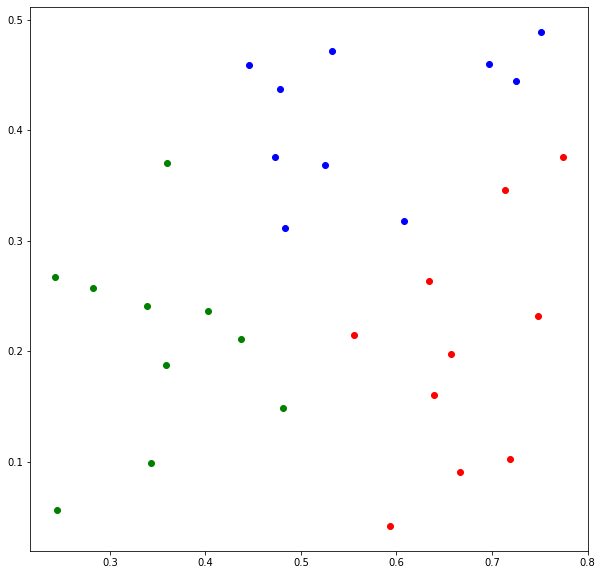

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(cluster_1[:,0], cluster_1[:,1], color='red')
plt.scatter(cluster_2[:,0], cluster_2[:,1], color='green')
plt.scatter(cluster_3[:,0], cluster_3[:,1], color='blue')
plt.xlabel('Density')
plt.ylabel('Sugar')
plt.title('Water Melon Data Set 4.0 with Clustering')